# Importing Libraries

In [17]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sd

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
#import gensim

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Loading Data

In [5]:
data = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\sentiment_data.tsv",delimiter="\t")
data = data[:2000]

In [6]:
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [7]:
data.describe()

,sentiment
count,2000.000000
mean,0.498500
std,0.500123
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
data = data.drop(['id'],axis=1)

In [9]:
data.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [11]:
data.shape

(2000, 2)

# Processing Message

In [13]:
def processing(review):
    
    #removing emails,urls,non-letters,numbers from the review respectively
    raw_review = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b',' ',review)
    
    raw_review = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)',' ',raw_review)
    
    raw_review = re.sub('[^a-zA-Z]',' ',raw_review)
    
    raw_review = re.sub('\d+(\.\d+)?',' ',raw_review)
    
    #convert to lower case, split into individual words
    words=raw_review.lower().split()
    
    
    #list of stop words in engilsh
    stops=set(stopwords.words("english"))
    
    #list of meaningful words from the review after applying stemming and removing stopwords
    meaningful_words=[ps.stem(w) for w in words if not w in stops]
    
    #returning the review after performing the sequence of operations
    #1.Removing emails,urls,non-letters,numbers 
    #2.Converting into lowercase
    #3.Removing stopwords like a,an,the,is and so on
    #4.Applying the stemming procedure
    #5.Joining the processed words with a space between them.
    return(" ".join(meaningful_words))

In [14]:
clean_review_corpus=[]

ps=PorterStemmer()

In [15]:
review_count=data['review'].size
review_count

2000

In [18]:
for i in range(0,review_count):
    clean_review_corpus.append(processing(data["review"][i]))

In [19]:
print("Original Text : \n")
data["review"][0]

Original Text : 



"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [20]:
print("Processed Text: \n")
clean_review_corpus[:1]

Processed Text: 



['stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad kay br br visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice br br actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music br br lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene br br bottom line movi peopl like mj one leve

# Vectors for each message 

In [21]:
cv=CountVectorizer()
data_input = cv.fit_transform(clean_review_corpus)
data_input = data_input.toarray()

In [22]:
data_input[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#  Word Cloud 

In [24]:
from wordcloud import WordCloud, STOPWORDS
stopwords= set(STOPWORDS)

def show_wordcloud(data, title= None):
    wordcloud = WordCloud(background_color='black',
                          stopwords=stopwords,
                          max_words=250,
                          max_font_size=40,
                          scale=3,
                          random_state=1).generate(str(data))
    fig=plt.figure(1,figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordcloud)
    plt.show()

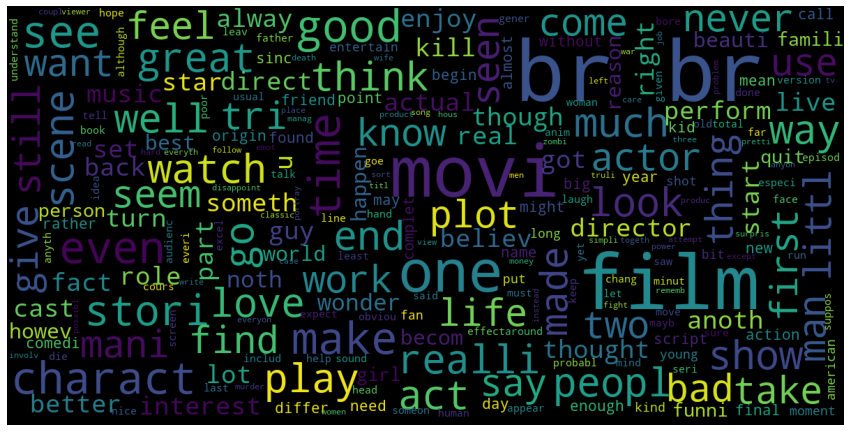

In [26]:
show_wordcloud(clean_review_corpus)

#  Classification 

In [27]:
data_output=data['sentiment']
print(data_output.value_counts())

0    1003
1     997
Name: sentiment, dtype: int64


<AxesSubplot:>

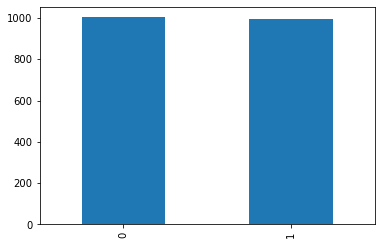

In [30]:
data['sentiment'].value_counts().plot.bar()

In [32]:
from sklearn.model_selection import train_test_split
train_x ,test_x , train_y , test_y  =train_test_split(data_input,data_output,test_size=0.20,random_state=0)

#  ML Models 

###  GaussianNB Model

In [33]:
model_nvb = GaussianNB()
model_nvb.fit(train_x,train_y)

GaussianNB()

In [34]:
prediction_nvb=model_nvb.predict(test_x)

####  Results

In [35]:
print("Accuracy for Naive Bayes : %0.5f \n\n" % accuracy_score(test_y,prediction_nvb))
print("Classification Report for Naive Bayes : \n",classification_report(test_y,prediction_nvb))

Accuracy for Naive Bayes : 0.63000 


Classification Report for Naive Bayes : 
               precision    recall  f1-score   support

           0       0.65      0.71      0.68       219
           1       0.60      0.54      0.57       181

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.63      0.63      0.63       400



###  Decision Tree 

In [36]:
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [37]:
prediction_dt=model_dt.predict(test_x)

#### Results

In [38]:
print("Accuracy for Decision Tree : %0.5f \n\n" % accuracy_score(test_y,prediction_dt))
print("Classification Report for Decision Tree : \n",classification_report(test_y,prediction_dt))

Accuracy for Decision Tree : 0.67500 


Classification Report for Decision Tree : 
               precision    recall  f1-score   support

           0       0.74      0.63      0.68       219
           1       0.62      0.73      0.67       181

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.67       400
weighted avg       0.69      0.68      0.68       400



### Random Forest

In [39]:
model_rf = RandomForestClassifier()
model_rf.fit(train_x,train_y)

RandomForestClassifier()

In [40]:
prediction_rf=model_rf.predict(test_x)

####  Results

In [41]:
print("Accuracy for Random Forest : %0.5f \n\n" % accuracy_score(test_y,prediction_rf))
print("Classification Report for Random Forest : \n",classification_report(test_y,prediction_rf))

Accuracy for Random Forest : 0.80500 


Classification Report for Random Forest : 
               precision    recall  f1-score   support

           0       0.86      0.77      0.81       219
           1       0.75      0.85      0.80       181

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.80       400
weighted avg       0.81      0.81      0.81       400

